In [ ]:
import trimesh
import cv2
import matplotlib.pyplot as plt
from core.utils.draw_utils import *
import numpy as np
from pathlib import Path
import json

/home/giakhang/miniconda3/envs/rdpn6d/lib/python3.9/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


In [2]:
def draw_6d_pose(rgb, pred_rot, pred_trans, model_points, K):
    img = draw_detections(rgb, pred_rot, pred_trans, model_points, K, color=(255, 0, 0))
    
    return img

In [3]:
num = 7
track_num = f"track_{num:02d}"
src_dir = Path(f"./datasets/lumi_piano_dataset/data/{track_num}")

img_idx = 2
pose_idx = 0

img_path = src_dir / f"rgb/{img_idx:05d}.png"
cad_path = "/home/giakhang/dev/RDPN6D/datasets/lumi_piano_dataset/models/obj_000001.ply"
gt_path = src_dir / "scene_gt.json"
camera_info_path = src_dir / "scene_camera.json"
#cad_path = "/home/giakhang/dev/RDPN6D/datasets/lumi_piano_dataset/models_eval/obj_000001.ply"
#cad_path = "/media/giakhang/OS/dataset/piano_6d/mesh/LUMI.obj"

In [4]:
img = cv2.imread(img_path)[..., ::-1]

mesh = trimesh.load_mesh(cad_path)
mesh = mesh.sample(1024).astype(np.float32)

with open(gt_path) as f:
    gt = json.load(f)
with open(camera_info_path) as f:
    camera_info = json.load(f)

K = np.array(camera_info[str(img_idx)]["cam_K"]).reshape(3, 3)

rot = np.array(gt[str(img_idx)][pose_idx]["cam_R_m2c"]).reshape(3, 3)

trans = np.array(gt[str(img_idx)][pose_idx]["cam_t_m2c"])

In [5]:
vis_img = draw_6d_pose(img, rot[None, ...], trans[None, ...], mesh * 1000, K[None, ...])

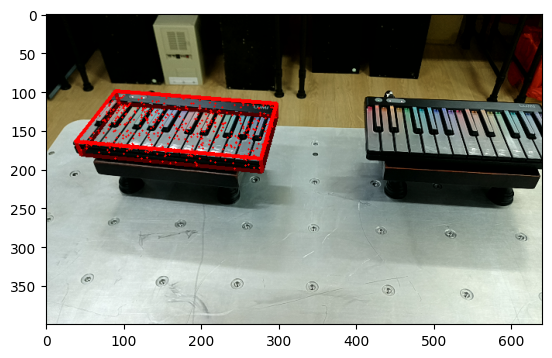

In [6]:
plt.imshow(vis_img)

In [7]:
from lib.pysixd import inout, misc

model = inout.load_ply(cad_path, vertex_scale=1)
model["bbox3d_and_center"] = misc.get_bbox3d_and_center(model["pts"])
kpts_3d = model["bbox3d_and_center"]

kpts_2d = misc.project_pts(kpts_3d, K, rot, trans / 1000)

In [8]:
img_vis_kpts2d = misc.draw_projected_box3d(img.copy(), kpts_2d)

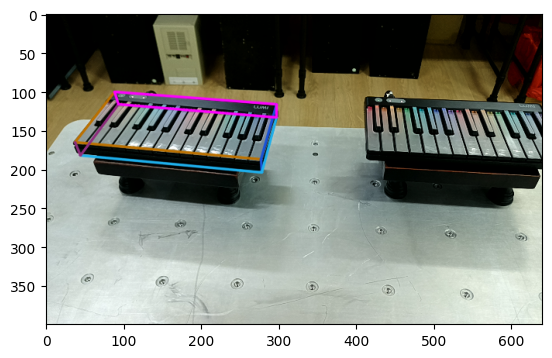

In [9]:
plt.imshow(img_vis_kpts2d)

In [13]:
num = 3
src_dir = Path(f"./datasets/syn_lumi_piano_dataset/data/synthetic_data{num}")

img_idx = 1000
pose_idx = 0

img_path = src_dir / f"rgb/{img_idx:05d}.png"
cad_path = "/home/giakhang/dev/RDPN6D/datasets/syn_lumi_piano_dataset/models/obj_000001.ply"
gt_path = src_dir / "scene_gt.json"
camera_info_path = src_dir / "scene_camera.json"

In [14]:
img = cv2.imread(img_path)[..., ::-1]

mesh = trimesh.load_mesh(cad_path)
mesh = mesh.sample(1024).astype(np.float32)

with open(gt_path) as f:
    gt = json.load(f)
with open(camera_info_path) as f:
    camera_info = json.load(f)

K = np.array(camera_info[str(img_idx)]["cam_K"]).reshape(3, 3)

rot = np.array(gt[str(img_idx)][pose_idx]["cam_R_m2c"]).reshape(3, 3)

trans = np.array(gt[str(img_idx)][pose_idx]["cam_t_m2c"])

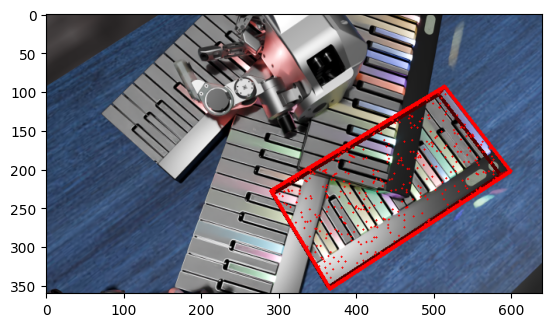

In [15]:
vis_img = draw_6d_pose(img, rot[None, ...], trans[None, ...], mesh * 1000, K[None, ...])
plt.imshow(vis_img)

In [7]:
img_path = "/home/giakhang/dev/RDPN6D/datasets/lumi_piano_external_camera/data/track_05/rgb/00010.png"
cad_path = "/home/giakhang/dev/RDPN6D/datasets/syn_lumi_piano_dataset/models/obj_000001.ply"

In [8]:
img = cv2.imread(img_path)[..., ::-1]

mesh = trimesh.load_mesh(cad_path)
mesh = mesh.sample(1024).astype(np.float32)

K = np.array([
    [526.0, 0.0, 318.0],
    [0.0, 526.0, 185.0],
    [0, 0, 1],
])

gt = [
    {
        "rot": np.array([
            [-0.9533402323722839, 0.1689041256904602, -0.25022807717323303],
            [0.09070784598588943, -0.6302963495254517, -0.7710370421409607],
            [-0.2879490852355957, -0.7577583193778992, 0.5855661034584045]
        ]),
        "trans": np.array([-420.11810302734375, 46.5606803894043, 898.1151123046875])
    },
    {
        "rot": np.array([
            [-0.8570613265037537, 0.2411351054906845, 0.4553011357784271],
            [-0.48824381828308105, -0.662304162979126, -0.5683053135871887],
            [0.16450944542884827, -0.7093709707260132, 0.6853681802749634]
        ]),
        "trans": np.array([-75.98056030273438, -3.5586323738098145, 1039.1923828125])
    }
]


In [9]:
for pose in gt:
    rot, trans = pose["rot"], pose["trans"]
    img = draw_6d_pose(img, rot[None, ...], trans[None, ...], mesh * 1000, K[None, ...])

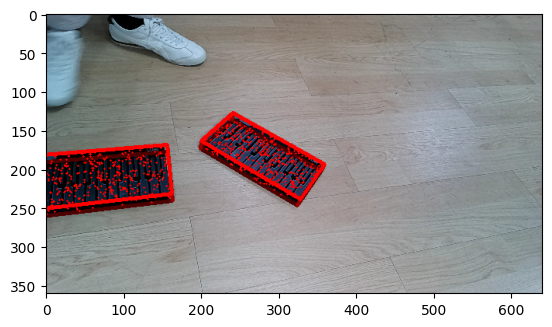

In [10]:
plt.imshow(img)

In [1]:
import pickle

In [2]:
with open("/home/giakhang/dev/RDPN6D/datasets/lumi_piano_dataset/models/fps_points.pkl", 'rb') as f:
    data = pickle.load(f)

In [7]:
data["1"]["fps256_and_center"].shape

(257, 3)